In [2]:
import vrep 
import sys
import time 
import numpy as np
from tank import *

In [2]:
vrep.simxFinish(-1) # closes all opened connections, in case any prevoius wasnt finished
clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5) # start a connection

if clientID!=-1:
    print ("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

#create instance of Tank
tank=Tank(clientID)

# get handle to proximity sensor
err_code,ps_handle = vrep.simxGetObjectHandle(clientID,"Proximity_sensor", vrep.simx_opmode_blocking)

t = time.time()
tank.go()
while (time.time()-t)<20: # 10 seconds of communitation
    #read values from proximity sensor
    tank.forward(10)
    err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,ps_handle,vrep.simx_opmode_streaming)
    distance = np.linalg.norm(detectedPoint)
    # avoid collision
    if distance > 1.5 :
        tank.go()
    else:
        tank.stop()
    
    

vrep.simxStopSimulation(clientID,vrep.simx_opmode_oneshot) # stop the simulation in vrep

Connected to remote API server


1

In [2]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

# Delikatny Model

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
speed = ctrl.Antecedent(np.arange(0, 11, 1), 'speed')
distance = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
result = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'result')

# Auto-membership function population is possible with .automf(3, 5, or 7)
speed.automf(3)
distance.automf(3)
distance['poor'] = fuzz.trapmf(distance.universe,[0,0,2,5])
distance['average'] = fuzz.trimf(distance.universe,[2,5,10])
#distance['critical'] = fuzz.trapmf(distance.)


#speed['poor'] = fuzz.trimf(speed.universe,[0,0,3])
#speed['average'] = fuzz.trimf(speed.universe,[1,5,8])
#speed['good'] = fuzz.trimf(speed.universe,[6,10,10])


#distance['poor'] = fuzz.trimf(distance.universe,[0,0,2])
#distance['average'] = fuzz.trimf(distance.universe,[1,5,8])
#distance['good'] = fuzz.trimf(distance.universe,[6,10,10])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
result['low'] = fuzz.trapmf(result.universe, [0,0,0,0.1])
result['medium'] = fuzz.trapmf(result.universe,[0,0.1,0.9,1])
result['high'] = fuzz.trapmf(result.universe, [0.9,1,1.01,1.01])

rule1 = ctrl.Rule(speed['good'] & distance['poor'], result['high'])
rule2 = ctrl.Rule(speed['good'] & distance['average'], result['medium'])
rule3 = ctrl.Rule(speed['good'] & distance['good'], result['low'])

rule4 = ctrl.Rule(speed['average'] & distance['poor'], result['high'])
rule5 = ctrl.Rule(speed['average'] & distance['average'], result['medium'])
rule6 = ctrl.Rule(speed['average'] & distance['good'], result['low'])

rule7 = ctrl.Rule(speed['poor'] & distance['poor'], result['high'])
rule8 = ctrl.Rule(speed['poor'] & distance['average'], result['medium'])
rule9 = ctrl.Rule(speed['poor'] & distance['good'], result['low'])

F:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
F:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
F:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


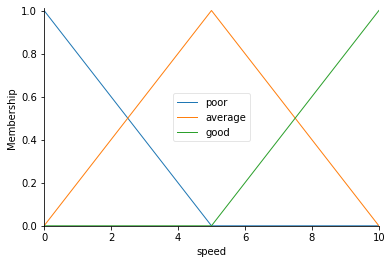

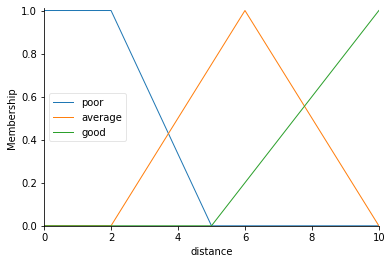

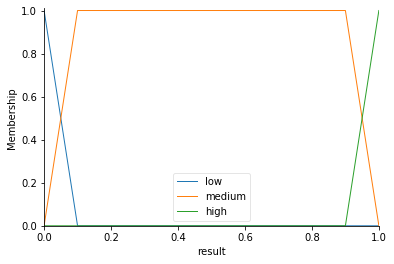

In [4]:
speed.view()
distance.view()
result.view()

In [322]:
tank_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [323]:
wynik = ctrl.ControlSystemSimulation(tank_ctrl)

In [324]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
wynik.input['speed'] = 1
wynik.input['distance'] = 1.5
# Crunch the numbers
wynik.compute()

0.9655555555555554


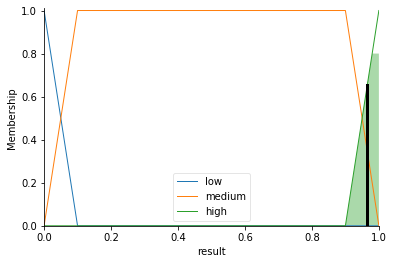

In [325]:
print(wynik.output['result'])
result.view(sim=wynik)

In [327]:
tab = np.arange(0,11,1)
for i in tab:
    wynik.input['speed'] = 10
    wynik.input['distance'] = i
    wynik.compute()
    print(wynik.output['result'])

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.5372134038800707
0.5083820662768032
0.5
0.49491039426523303
0.48999999999999994
0.47444991789819385
0.42415954415954427
0.03333333333333333


In [331]:
vrep.simxFinish(-1) # closes all opened connections, in case any prevoius wasnt finished
clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5) # start a connection

if clientID!=-1:
    print ("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

#create instance of Tank
tank=Tank(clientID)

# get handle to proximity sensor
err_code,ps_handle = vrep.simxGetObjectHandle(clientID,"Proximity_sensor", vrep.simx_opmode_blocking)

t = time.time()
speed0 = 10
tank.go()
while (time.time()-t)<80: # 10 seconds of communitation
    #read values from proximity sensor
    
    err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,ps_handle,vrep.simx_opmode_streaming)
    distance = np.linalg.norm(detectedPoint)
    # avoid collision
    
    #speed0 = tank.readVelocity()
    wynik.input['speed'] = speed0
    wynik.input['distance'] = distance
    wynik.compute()
    tank.forward(speed0 - speed0 * wynik.output['result'])
    print('Hamowanie',wynik.output['result'],'Dystans',distance,'Predkosc',tank.readVelocity())
    
    
    
    

vrep.simxStopSimulation(clientID,vrep.simx_opmode_oneshot) # stop the simulation in vrep

Connected to remote API server
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Ham

Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.48915040504786406 Dystans 7.176553895208774 Predkosc 5.10849594952136
Hamowanie 0.4891

Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889873634565866 Dystans 7.210555106188881 Predkosc 5.110126365434134
Hamowanie 0.4889

Hamowanie 0.48889488295325967 Dystans 7.229858414184501 Predkosc 5.1110511704674035
Hamowanie 0.48889488295325967 Dystans 7.229858414184501 Predkosc 5.1110511704674035
Hamowanie 0.48889488295325967 Dystans 7.229858414184501 Predkosc 5.1110511704674035
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 Dystans 7.244553322272957 Predkosc 5.11175479299295
Hamowanie 0.488824520700705 

Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamowanie 0.48877242864509407 Dystans 7.255437189531366 Predkosc 5.112275713549059
Hamo

Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888151591403531 Dystans 7.246508992265997 Predkosc 5.111848408596469
Hamowanie 0.4888

Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamowanie 0.48902196113680235 Dystans 7.203336774916481 Predkosc 5.109780388631976
Hamo

Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429 Dystans 7.06656394620337 Predkosc 5.103209036627571
Hamowanie 0.4896790963372429

Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamowanie 0.49005660760389225 Dystans 6.988273549742879 Predkosc 5.099433923961078
Hamo

Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903815087659728 Dystans 6.921058915068413 Predkosc 5.096184912340272
Hamowanie 0.4903

Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.0937891271963815
Hamowanie 0.49062108728036186 Dystans 6.871593426977555 Predkosc 5.093789127

Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49072554349141967 Dystans 6.850052467861316 Predkosc 5.092744565085804
Hamowanie 0.49082287655794343 Dystans 6.829994644381492 Predkosc 5.091771234420566
Hamowanie 0.49082287655794343 Dystans 6.829994644381492 Predkosc 5.091771234420566
Hamowanie 0.49082287655794343 Dystans 6.829994644381492 Predkosc 5.091771234420566
Hamowanie 0.49082287655794343 Dystans 6.829994644381492 Predkosc 5.091771234420566
Hamo

Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49090884641286925 Dystans 6.8122898765006905 Predkosc 5.0909115358713075
Hamowanie 0.49098593624662473 Dystans 6.796422960138221 Predkosc 5.090140637533753
Hamowanie 0.49098593624662473 Dystans 6.796422960138221 Predkosc 5.090140637533753
Hamowanie 0.49098593624662473 Dystans 6.796422960138221 Predkosc 5.09

Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.49105296797679215 Dystans 6.78263322206351 Predkosc 5.089470320232079
Hamowanie 0.4910

Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.757660575267617 Predkosc 5.088255598934
Hamowanie 0.49117444010659994 Dystans 6.

Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.49131677298771326 Dystans 6.72842643318516 Predkosc 5.086832270122867
Hamowanie 0.4913

Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.49148355743017197 Dystans 6.69420735671157 Predkosc 5.08516442569828
Hamowanie 0.4914835574301719

Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamowanie 0.49166913280004126 Dystans 6.656180173146835 Predkosc 5.083308671999587
Hamo

Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamowanie 0.49184914969343446 Dystans 6.619339513789957 Predkosc 5.081508503065655
Hamo

Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamowanie 0.49205721544183645 Dystans 6.576816894467468 Predkosc 5.079427845581636
Hamo

Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.0776337063587755
Hamowanie 0.49223662936412244 Dystans 6.540200030154664 Predkosc 5.077633706

Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamowanie 0.49240097300430113 Dystans 6.506699624110722 Predkosc 5.075990269956988
Hamo

Hamowanie 0.4924854444675399 Dystans 6.489495806566382 Predkosc 5.075145555324601
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925715802709838 Dystans 6.471963615128784 Predkosc 5.074284197290162
Hamowanie 0.4925

Hamowanie 0.49267120016617283 Dystans 6.451700190934989 Predkosc 5.073287998338271
Hamowanie 0.49267120016617283 Dystans 6.451700190934989 Predkosc 5.073287998338271
Hamowanie 0.49267120016617283 Dystans 6.451700190934989 Predkosc 5.073287998338271
Hamowanie 0.49267120016617283 Dystans 6.451700190934989 Predkosc 5.073287998338271
Hamowanie 0.49267120016617283 Dystans 6.451700190934989 Predkosc 5.073287998338271
Hamowanie 0.49267120016617283 Dystans 6.451700190934989 Predkosc 5.073287998338271
Hamowanie 0.4927667750898153 Dystans 6.4322729867082415 Predkosc 5.072332249101847
Hamowanie 0.4927667750898153 Dystans 6.4322729867082415 Predkosc 5.072332249101847
Hamowanie 0.4927667750898153 Dystans 6.4322729867082415 Predkosc 5.072332249101847
Hamowanie 0.4927667750898153 Dystans 6.4322729867082415 Predkosc 5.072332249101847
Hamowanie 0.4927667750898153 Dystans 6.4322729867082415 Predkosc 5.072332249101847
Hamowanie 0.4927667750898153 Dystans 6.4322729867082415 Predkosc 5.072332249101847
Hamo

Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamowanie 0.4928584006079848 Dystans 6.413660922593232 Predkosc 5.0714159939201515
Hamo

Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.069482003792452
Hamowanie 0.49305179962075474 Dystans 6.3744151206296555 Predkosc 5.06948200

Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.067818689000018
Hamowanie 0.49321813109999824 Dystans 6.3407051256306435 Predkosc 5.06781868

Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933977393768272 Dystans 6.304349079234974 Predkosc 5.066022606231728
Hamowanie 0.4933

Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046 Dystans 6.2677961377647 Predkosc 5.0642144796819535
Hamowanie 0.4935785520318046

Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011 Dystans 6.22956854296782 Predkosc 5.062321020960989
Hamowanie 0.4937678979039011

Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamowanie 0.49394972376448104 Dystans 6.192907712884874 Predkosc 5.060502762355189
Hamo

Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.058735846752644
Hamowanie 0.49412641532473556 Dystans 6.1573276242190085 Predkosc 5.05873584

Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamowanie 0.4943225073177238 Dystans 6.117893425488984 Predkosc 5.0567749268227615
Hamo

Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.49441301728096554 Dystans 6.099710458741713 Predkosc 5.055869827190344
Hamowanie 0.4944903322446365 Dystans 6.084187614387233 Predkosc 5.055096677553635
Hamow

Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamowanie 0.49456801458438354 Dystans 6.068599655310657 Predkosc 5.054319854156165
Hamo

Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947107167770626 Dystans 6.039987203092618 Predkosc 5.052892832229374
Hamowanie 0.4947

Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamowanie 0.4948864943961611 Dystans 6.004783148479046 Predkosc 5.0511350560383885
Hamo

Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.495057372960324 Dystans 5.970602752380194 Predkosc 5.0494262703967605
Hamowanie 0.4950

Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamowanie 0.49524649061172404 Dystans 5.932822860771015 Predkosc 5.047535093882759
Hamo

Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamowanie 0.49542993091589727 Dystans 5.896226117916934 Predkosc 5.045700690841027
Hamo

Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956153700922418 Dystans 5.859279609875008 Predkosc 5.043846299077582
Hamowanie 0.4956

Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamowanie 0.49580452797971486 Dystans 5.821642944837518 Predkosc 5.041954720202852
Hamo

Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.495893248096181 Dystans 5.804007992267795 Predkosc 5.04106751903819
Hamowanie 0.49597949896537574 Dystans 5.786874655842733 Predkosc 5.040205010346242
Hamowanie 0.49597949896537574 Dystans 5.786874655842733 Predkosc 5.040205010346242
Hamowanie 0.49597949896537574 Dystans 5.786874655842733 Predkosc 5.040205010346242
Hamowanie 0.49597949896537574 Dystans 5.786874655842733 Predkosc 5.040205010346242
Hamowanie 0.4959794989653757

Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.039295638566163
Hamowanie 0.49607043614338375 Dystans 5.7688219370948675 Predkosc 5.03929563

Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962564588874112 Dystans 5.731929828258331 Predkosc 5.037435411125887
Hamowanie 0.4962

Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamowanie 0.49645110026876876 Dystans 5.693381458527255 Predkosc 5.035488997312313
Hamo

Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966401997038798 Dystans 5.655982536479966 Predkosc 5.033598002961202
Hamowanie 0.4966

Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.626105017755755 Predkosc 5.03208545179968
Hamowanie 0.496791454820032 Dystans 5.62

Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933 Dystans 5.59810868397946 Predkosc 5.030666631728067
Hamowanie 0.4969333368271933

Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamowanie 0.49709849445053783 Dystans 5.565555786198861 Predkosc 5.029015055494622
Hamo

Hamowanie 0.49718794093385443 Dystans 5.547941961744061 Predkosc 5.028120590661455
Hamowanie 0.49718794093385443 Dystans 5.547941961744061 Predkosc 5.028120590661455
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamowanie 0.4972732290373322 Dystans 5.531157641585034 Predkosc 5.0272677096266785
Hamo

Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49737073023379824 Dystans 5.51198255458204 Predkosc 5.026292697662018
Hamowanie 0.49746284463806734 Dystans 5.493879320824191 Predkosc 5.025371553619326
Hamowanie 0.49746284463806734 Dystans 5.493879320824191 Predkosc 5.025371553619326
Hamowanie 0.49

Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.4975569378247197 Dystans 5.475399692167196 Predkosc 5.024430621752803
Hamowanie 0.49765341386689155 Dystans 5.456465186071678 Predkosc 5.0234658613310845
Hamowanie 0.49765341386689155 Dystans 5.456465186071678 Predkosc 5.0234658613310845
Hamowanie 0.

Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamowanie 0.49775302689209316 Dystans 5.43692893525276 Predkosc 5.0224697310790685
Hamo

Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamowanie 0.49794172889795174 Dystans 5.399959193194828 Predkosc 5.020582711020483
Hamo

Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamowanie 0.4981326038785799 Dystans 5.3626153381417385 Predkosc 5.018673961214201
Hamo

Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamowanie 0.49830697889990716 Dystans 5.328544973703877 Predkosc 5.016930211000928
Hamo

Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.015151178940231
Hamowanie 0.49848488210597686 Dystans 5.2938298525341345 Predkosc 5.01515117

Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamowanie 0.49868713358189454 Dystans 5.254418224655328 Predkosc 5.013128664181055
Hamo

Hamowanie 0.49879125440208 Dystans 5.2341514565911 Predkosc 5.0120874559792
Hamowanie 0.49879125440208 Dystans 5.2341514565911 Predkosc 5.0120874559792
Hamowanie 0.49879125440208 Dystans 5.2341514565911 Predkosc 5.0120874559792
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.49889080869452246 Dystans 5.214787959687864 Predkosc 5.011091913054775
Hamowanie 0.4988908086945

Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.4989735045955402 Dystans 5.198714161004356 Predkosc 5.010264954044598
Hamowanie 0.49904989334091804 Dystans 5.183874932368715 Predkosc 5.009501066590819
Hamowanie 0.49904989334091804 Dystans 5.183874932368715 Predkosc 5.009501066590819
Hamowanie 0.49904989334091804 Dystans 5.183874932368715 Predkosc 5.009501066590819
Hamowanie 0.49904989334091804 Dystans 5.183874932368715 Predkosc 5.009501066590819
Hamowanie 0.

Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4991247442808302 Dystans 5.169342477449591 Predkosc 5.008752557191698
Hamowanie 0.4992048682758883 Dystans 5.153795066491458 Predkosc 5.007951317241117
Hamowanie 0.4992048682758883 Dystans 5.153795066491458 Predkosc 5.007951317241117
Hamowanie 0.4992

Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49929567040181233 Dystans 5.13618667003719 Predkosc 5.007043295981877
Hamowanie 0.49938759870902844 Dystans 5.118371807353946 Predkosc 5.006124012909716
Hamowanie 0.49938759870902844 Dystans 5.118371807353946 Predkosc 5.006124012909716
Hamowanie 0.49938759870902844 Dystans 5.118371807353946 Predkosc 5.006124012909716
Hamowanie 0.4

Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.0051754791626895
Hamowanie 0.4994824520837311 Dystans 5.1000026659079225 Predkosc 5.005175479

Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.066505870177705 Predkosc 5.00344409376506
Hamowanie 0.499655590623494 Dystans 5.06

Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamowanie 0.49983388782423055 Dystans 5.032055471164071 Predkosc 5.001661121757694
Hamo

Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000415366675025 Dystans 4.995192880785032 Predkosc 4.999584633324975
Hamowanie 0.5000

Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003221828367426 Dystans 4.962674706841783 Predkosc 4.996778171632574
Hamowanie 0.5003

Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5004739441999548 Dystans 4.945062362882973 Predkosc 4.995260558000451
Hamowanie 0.5006

Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007566295183765 Dystans 4.912203638707976 Predkosc 4.992433704816235
Hamowanie 0.5007

Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012469403201852 Dystans 4.855049515330688 Predkosc 4.987530596798147
Hamowanie 0.5012

Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015832525695889 Dystans 4.815728010015384 Predkosc 4.984167474304111
Hamowanie 0.5015

Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.501927331237127 Dystans 4.7753985243249195 Predkosc 4.980726687628731
Hamowanie 0.5019

Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022043361155388 Dystans 4.742857262611839 Predkosc 4.977956638844612
Hamowanie 0.5022

Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024412288674767 Dystans 4.714976143259188 Predkosc 4.975587711325233
Hamowanie 0.5024

Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027086636955955 Dystans 4.683442671403264 Predkosc 4.972913363044045
Hamowanie 0.5027

Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029974218028407 Dystans 4.649326201978263 Predkosc 4.970025781971593
Hamowanie 0.5029

Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033146682295564 Dystans 4.611761510635934 Predkosc 4.966853317704436
Hamowanie 0.5033

Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031719829405955 Dystans 4.628667343345529 Predkosc 4.968280170594045
Hamowanie 0.5031

Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamowanie 0.5034276369132948 Dystans 4.5983642205337425 Predkosc 4.965723630867052
Hamo

Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5035959370760619 Dystans 4.578384707343182 Predkosc 4.964040629239381
Hamowanie 0.5037426882023819 Dystans 4.560943524345318 Predkosc 4.962573117976181
Hamowanie 0.5037426882023819 Dystans 4.560943524345318 Predkosc 4.962573117976181
Hamowanie 0.5037426882023819 Dystans 4.560943524345318 Predkosc 4.962573117976181
Hamowanie 0.5037

Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamowanie 0.5038740382529467 Dystans 4.5453170645129095 Predkosc 4.961259617470533
Hamo

Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042111842744397 Dystans 4.505139647580927 Predkosc 4.957888157255603
Hamowanie 0.5042

Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044740263927517 Dystans 4.473749224955655 Predkosc 4.955259736072483
Hamowanie 0.5044

Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047956856645127 Dystans 4.435253635588886 Predkosc 4.952043143354873
Hamowanie 0.5047

Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamowanie 0.5050166542344905 Dystans 4.4087569532978605 Predkosc 4.949833457655095
Hamo

Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamowanie 0.5053368309879569 Dystans 4.3702894979598135 Predkosc 4.946631690120431
Hamo

Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647 Dystans 4.33427164693397 Predkosc 4.943640450579353
Hamowanie 0.5056359549420647

Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamowanie 0.5059055607795496 Dystans 4.301742035406801 Predkosc 4.9409443922045035
Hamo

Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.261992990877591 Predkosc 4.93765701519496
Hamowanie 0.506234298480504 Dystans 4.26

Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064742384775814 Dystans 4.232921982368623 Predkosc 4.935257615224185
Hamowanie 0.5064

Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamowanie 0.5068057320945456 Dystans 4.192676615886693 Predkosc 4.9319426790545435
Hamo

Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamowanie 0.5070713579144179 Dystans 4.1603595026702225 Predkosc 4.929286420855821
Hamo

Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamowanie 0.5073743341843746 Dystans 4.123423735884218 Predkosc 4.9262566581562535
Hamo

Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076289401326777 Dystans 4.092323403502304 Predkosc 4.923710598673223
Hamowanie 0.5076

Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079329791978118 Dystans 4.055111297740204 Predkosc 4.920670208021882
Hamowanie 0.5079

Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5080532188593705 Dystans 4.040372785217056 Predkosc 4.919467811406295
Hamowanie 0.5082136707840172 Dystans 4.02068571124087 Predkosc 4.9178632921598275
Hamowanie 0.5082136707840172 Dystans 4.02068571124087 Predkosc 4.9178632921598275
Hamowanie 0.5082136707840172 Dystans 4.02068571124087 Predkosc 4.9178632921598275
Hamowanie 0.5082136707840172 Dystans 4.02068571124087 Predkosc 4.9178632921598275
Hamowanie 0.5082136707840172 Dystans 4.02068571124087 Predkosc 4.9178632921598275
Hamowanie 0.5082

Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083710496975923 Dystans 4.001354028104875 Predkosc 4.916289503024077
Hamowanie 0.5083

Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085890492350877 Dystans 3.974540546185548 Predkosc 4.914109507649123
Hamowanie 0.5085

Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088774910952976 Dystans 3.938999506358852 Predkosc 4.911225089047024
Hamowanie 0.5088

Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamowanie 0.5091382471387927 Dystans 3.9068077558542753 Predkosc 4.908617528612073
Hamo

Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamowanie 0.5094345095702412 Dystans 3.8701609736960267 Predkosc 4.905654904297588
Hamo

Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097101800634701 Dystans 3.835992938738133 Predkosc 4.902898199365299
Hamowanie 0.5097

Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099891041912815 Dystans 3.801354477753277 Predkosc 4.900108958087185
Hamowanie 0.5099

Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102712984274808 Dystans 3.766241145244067 Predkosc 4.897287015725192
Hamowanie 0.5102

Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamowanie 0.5105296089472473 Dystans 3.7340389931956297 Predkosc 4.894703910527527
Hamo

Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5106762097708711 Dystans 3.7157372745700616 Predkosc 4.893237902291289
Hamowanie 0.5108217941384413 Dystans 3.697543957498042 Predkosc 4.891782058615587
Hamowanie 0.5108217941384413 Dystans 3.697543957498042 Predkosc 4.891782058615587
Hamowanie 0.5108217941384413 Dystans 3.697543957498042 Predkosc 4.891782058615587
Hamowanie 0.5108217941384413 Dystans 3.697543957498042 Predkosc 4.891782058615587
Hamowanie 0.5108217941384413 Dystans 3.697543957498042 Predkosc 4.891782058615587
Hamowanie

Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.682435130960068 Predkosc 4.89057415790063
Hamowanie 0.510942584209937 Dystans 3.68

Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamowanie 0.5112369001580755 Dystans 3.6455679674277177 Predkosc 4.887630998419245
Hamo

Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115068934858917 Dystans 3.611681259488289 Predkosc 4.884931065141083
Hamowanie 0.5115

Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117986175075825 Dystans 3.574995819620878 Predkosc 4.882013824924175
Hamowanie 0.5117

Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamowanie 0.5120329909841068 Dystans 3.5454687474023707 Predkosc 4.879670090158932
Hamo

Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamowanie 0.5122698951842128 Dystans 3.5155742176985827 Predkosc 4.877301048157872
Hamo

Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamowanie 0.5131344001204199 Dystans 3.4805730826656385 Predkosc 4.868655998795801
Hamo

Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamowanie 0.5146073736334124 Dystans 3.4429350700178065 Predkosc 4.853926263665876
Hamo

Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamowanie 0.5159357567327808 Dystans 3.4100683423134037 Predkosc 4.840642432672192
Hamo

Hamowanie 0.5167805617220458 Dystans 3.3896839274813098 Predkosc 4.832194382779543
Hamowanie 0.5167805617220458 Dystans 3.3896839274813098 Predkosc 4.832194382779543
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.5174745299567161 Dystans 3.3732339785008247 Predkosc 4.82525470043284
Hamowanie 0.51

Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5180205164833671 Dystans 3.3604759206424175 Predkosc 4.819794835166329
Hamowanie 0.5188420452155034 Dystans 3.3415801061820964 Predkosc 4.811579547844966
Hamowanie 0.5188420452155034 Dystans 3.3415801061820964 Predkosc 4.811579547844966
Hamowanie 0.5188420452155034 Dystans 3.3415801061820964 Predkosc 4.811579547844966
Hamo

Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.322191135143359 Predkosc 4.80298446264556
Hamowanie 0.519701553735444 Dystans 3.32

Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210318799970626 Dystans 3.292930736383671 Predkosc 4.789681200029374
Hamowanie 0.5210

Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228690073858183 Dystans 3.253973489978938 Predkosc 4.771309926141817
Hamowanie 0.5228

Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243460553122611 Dystans 3.223827179859751 Predkosc 4.756539446877389
Hamowanie 0.5243

Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamowanie 0.5261685053698034 Dystans 3.1880153370028075 Predkosc 4.738314946301966
Hamo

Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277477855711737 Dystans 3.158169013922347 Predkosc 4.722522144288263
Hamowanie 0.5277

Hamowanie 0.5288219552459982 Dystans 3.1384749580344367 Predkosc 4.7117804475400185
Hamowanie 0.5288219552459982 Dystans 3.1384749580344367 Predkosc 4.7117804475400185
Hamowanie 0.5288219552459982 Dystans 3.1384749580344367 Predkosc 4.7117804475400185
Hamowanie 0.5288219552459982 Dystans 3.1384749580344367 Predkosc 4.7117804475400185
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198
Hamowanie 0.5296968483240801 Dystans 3.1227864124246696 Predkosc 4.703031516759198


Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamowanie 0.5311625126371065 Dystans 3.0971915893642645 Predkosc 4.688374873628936
Hamo

Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5321392719647791 Dystans 3.080598926345253 Predkosc 4.678607280352209
Hamowanie 0.5331

Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341604279805793 Dystans 3.047398993784708 Predkosc 4.658395720194207
Hamowanie 0.5341

Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 Dystans 3.0135103848156115 Predkosc 4.63678024403511
Hamowanie 0.536321975596489 

Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383561034410752 Dystans 2.983064219932046 Predkosc 4.616438965589248
Hamowanie 0.5383

Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamowanie 0.5407188175499453 Dystans 2.9493585173654298 Predkosc 4.592811824500547
Hamo

Hamowanie 0.5417851496815501 Dystans 2.9347024504728307 Predkosc 4.582148503184499
Hamowanie 0.5417851496815501 Dystans 2.9347024504728307 Predkosc 4.582148503184499
Hamowanie 0.5417851496815501 Dystans 2.9347024504728307 Predkosc 4.582148503184499
Hamowanie 0.5417851496815501 Dystans 2.9347024504728307 Predkosc 4.582148503184499
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.5428666899737122 Dystans 2.920176479414094 Predkosc 4.571333100262878
Hamowanie 0.

Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamowanie 0.5442261364487452 Dystans 2.9023874498950204 Predkosc 4.557738635512548
Hamo

Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamowanie 0.5468125234281571 Dystans 2.8699236882199837 Predkosc 4.531874765718429
Hamo

Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamowanie 0.5494084040776488 Dystans 2.8390572722520915 Predkosc 4.505915959223512
Hamo

Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamowanie 0.5524153589654612 Dystans 2.8053015769923513 Predkosc 4.475846410345388
Hamo

Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552005713087962 Dystans 2.775811996772725 Predkosc 4.447994286912039
Hamowanie 0.5552

Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581429161262345 Dystans 2.746377748384459 Predkosc 4.418570838737655
Hamowanie 0.5581

Hamowanie 0.5598803405886192 Dystans 2.7297741659557118 Predkosc 4.401196594113808
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamowanie 0.5617624121010211 Dystans 2.7124033360776227 Predkosc 4.382375878989789
Hamo

Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635713416692696 Dystans 2.696283019703349 Predkosc 4.364286583307305
Hamowanie 0.5635

Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658880153127247 Dystans 2.676420682506605 Predkosc 4.341119846872753
Hamowanie 0.5658

Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699133359252678 Dystans 2.643861836273726 Predkosc 4.300866640747322
Hamowanie 0.5699

Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507 Dystans 2.61426093567616 Predkosc 4.261553015820493
Hamowanie 0.5738446984179507

Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.2163267824868855
Hamowanie 0.5783673217513114 Dystans 2.5826351446268183 Predkosc 4.216326782

Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825229484285276 Dystans 2.555645724551029 Predkosc 4.174770515714724
Hamowanie 0.5825

Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5849996864738182 Dystans 2.540423858448844 Predkosc 4.1500031352618185
Hamowanie 0.5872613613772859 Dystans 2.527049864182329 Predkosc 4.1273863862271405
Hamowanie 0.5872613613772859 Dystans 2.527049864182329 Predkosc 4.1273863862271405
Hamowanie 0.5872613613772859 Dystans 2.527049864182329 Predkosc 4.1273863862271405
Hamowanie 0.5872613613772859 Dystans 2.527049864182329 Predkosc 4.1273863862271405
Hamo

Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5903823963961196 Dystans 2.5093713634483743 Predkosc 4.096176036038805
Hamowanie 0.5929429073451878 Dystans 2.4955021141877243 Predkosc 4.070570926548122
Hamowanie 0.5929429073451878 Dystans 2.4955021141877243 Predkosc 4.070570926548122
Hamo

Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959803976013994 Dystans 2.479744580952604 Predkosc 4.040196023986006
Hamowanie 0.5959

Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamowanie 0.6013004360498412 Dystans 2.4538270117486483 Predkosc 3.986995639501588
Hamo

Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamowanie 0.6072004546089614 Dystans 2.4273486345703463 Predkosc 3.927995453910386
Hamo

Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamowanie 0.6139587758704833 Dystans 2.3996064612790753 Predkosc 3.860412241295167
Hamo

Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.7863551581573516
Hamowanie 0.6213644841842648 Dystans 2.3719862464874963 Predkosc 3.786355158

Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6255879651693257 Dystans 2.357390595212148 Predkosc 3.744120348306743
Hamowanie 0.6295794828009404 Dystans 2.344296608402078 Predkosc 3.704205171990596
Hamowanie 0.6295794828009404 Dystans 2.344296608402078 Predkosc 3.704205171990596
Hamowanie 0.6295794828009404 Dystans 2.344296608402078 Predkosc 3.704205171990596
Hamowanie 0.6295794828009404 Dystans 2.344296608402078 Predkosc 3.704205171990596
Hamowanie 0.6295794828009404 Dystans 2.344296608402078 Predkosc 3.704205171990596
Hamowanie 0.6295

Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamowanie 0.6335274736770599 Dystans 2.331967005651076 Predkosc 3.6647252632294016
Hamo

Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamowanie 0.6419383071445551 Dystans 2.307572729529877 Predkosc 3.5806169285544485
Hamo

Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523198518809212 Dystans 2.28055323158731 Predkosc 3.4768014811907877
Hamowanie 0.6523

Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6569917314045901 Dystans 2.2693720344956434 Predkosc 3.4300826859540994
Hamowanie 0.6616835505395605 Dystans 2.2586925795859782 Predkosc 3.3831644946043946
Hamowanie 0.6616835505395605 Dystans 2.2586925795859782 Predkosc 3.3831644946043946
Hamowanie 0.6616835505395605 Dystans 2.2586925795859782 Predkosc 3.3831644946043946
Hamowanie 0.6616835505395605 Dystans 2.2586925795859782 Predkosc 3.383164494

Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.3458758319749027
Hamowanie 0.6654124168025097 Dystans 2.2505718924077773 Predkosc 3.345875831

Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.2066726048927663
Hamowanie 0.6793327395107234 Dystans 2.2228254612850296 Predkosc 3.206672604

Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamowanie 0.6891840881086908 Dystans 2.205334624910514 Predkosc 3.1081591189130915
Hamo

Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamowanie 0.7026151303026439 Dystans 2.1838980539520594 Predkosc 2.973848696973561
Hamo

Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.7914092929007666
Hamowanie 0.7208590707099234 Dystans 2.1584987825713187 Predkosc 2.791409292

Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372916269073733 Dystans 2.138628543458346 Predkosc 2.627083730926268
Hamowanie 0.7372

Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamowanie 0.7487721347032869 Dystans 2.126156764920656 Predkosc 2.5122786529671313
Hamo

Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.2803730461286706
Hamowanie 0.7719626953871329 Dystans 2.1039007993165644 Predkosc 2.280373046

Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamowanie 0.8886635407129132 Dystans 2.029831709856695 Predkosc 1.1133645928708678
Hamo

Hamowanie 0.8021806162198096 Dystans 2.079636287818371 Predkosc 1.9781938378019035
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.8154345291158144 Dystans 2.070355188368325 Predkosc 1.845654708841856
Hamowanie 0.815

Hamowanie 0.8162346344987653 Dystans 2.0698180523579297 Predkosc 1.8376536550123461
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9705490153494425 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9650102715410382 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9650102715410382 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9650102715410382 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9593805387560652 Predkosc 0.333333333

Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.8540515296200418 Dystans 2.0470254947841084 Predkosc 1.459484703799582
Hamowanie 0.9666666666666667 Dystans 1.9530897749646072 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9530897749646072 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9530897749646072 Predkosc 0.3333333333333339
H

Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9512335465689183 Predkosc 0.333333333

Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.4205541357683042
Hamowanie 0.8579445864231695 Dystans 2.0449356903938094 Predkosc 1.420554135

Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamowanie 0.8651209626047631 Dystans 2.041193195821238 Predkosc 1.3487903739523688
Hamo

Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamowanie 0.896410589709168 Dystans 2.0263720268651717 Predkosc 1.0358941029083208
Hamo

Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200388967170186 Dystans 2.016567918150014 Predkosc 0.799611032829814
Hamowanie 0.9200

Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamowanie 0.9238387573512552 Dystans 2.015088122636259 Predkosc 0.7616124264874475
Hamo

Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamowanie 0.9342566492597096 Dystans 2.0111573584323934 Predkosc 0.657433507402903
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9077354947905663 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901500326409591 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9010970275429782 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9010970275429782 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.901635060549737 Predkosc 0.3333333333333339
Ha

Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9023106076080905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9033150923463362 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9033150923463362 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9033150923463362 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9033150923463362 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9033150923463362 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9932398632716513 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9924591935461364 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.990209862691557 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9878288223526863 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9862845248962226 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9839278438849686 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9835534297223718 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9808321591723108 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9791423098915415 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9772106250057042 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9747707124068852 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9722481730202293 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9704849250144338 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9690706520990502 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9672923296028189 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.965826868957215 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.962978351420258 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9604578471791034 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.957063105308505 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9524467503880112 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.947825621617959 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9429187862741104 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9424586903744905 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9418789633844276 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8359842391448329 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.867691993285736 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.831113224033065 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8304163354092442 Predkosc 0.3333333333333339
Ham

Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318774260360522 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9227547886286966 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9211437644889646 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9192585183842017 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9176070750607488 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.916109242320729 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.9151001630804336 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9145404422725405 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9131079983984414 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9119976138587529 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9113399940385534 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9091221861584413 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9062253444910329 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9041524415267714 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9031333469159042 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.9014303121460046 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8993367613861512 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8968855548383394 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8951131177967664 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8917787933792667 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8879519525950041 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8845629068381677 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8790093079646106 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8768177371344634 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8768177371344634 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8768177371344634 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8768177371344634 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875482771410882 Predkosc 0.3333333333333339


Hamowanie 0.9666666666666667 Dystans 1.8757026008801174 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8757026008801174 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8757026008801174 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.875267195340714 Predkosc 0.3333333333333339
H

Hamowanie 0.9666666666666667 Dystans 1.8744450332795886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8744450332795886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8744450332795886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8744450332795886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8744450332795886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8734152926457874 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7719786981617671 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7686334385427653 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7686334385427653 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7649367042065842 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8001770172145122 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.75872659287185 Predkosc 0.3333333333333339
Hamowanie 0.9666

Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7615367860733555 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8564515568085505 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.851977882180807 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8515007177345177 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8506444775707624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8503945963804649 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8499715328703008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8497722017393763 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8489979106118941 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8468896225002016 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.844867759853914 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8417885351378258 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8391751687932498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8390263233455446 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8386883885798881 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8386883885798881 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8386883885798881 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8386883885798881 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8386883885798881 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8386883885798881 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8378631183383036 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8378631183383036 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8378631183383036 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8378631183383036 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8378631183383036 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8378631183383036 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8369379034716289 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8369379034716289 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8364641732300595 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8353020533066264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.834242727906434 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.834242727906434 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.834242727906434 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.834242727906434 Predkosc 0.3333333333333

Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8336848397685572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8328223516274773 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8318646541376196 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318646541376196 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8318646541376196 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8308038289544106 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.829208206827729 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.8279298602253673 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8260906954888565 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8230789926284554 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.8218236848052003 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8218236848052003 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8218236848052003 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8218236848052003 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8218236848052003 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8218236848052003 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.819840154854468 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.819840154854468 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.819840154854468 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.819840154854468 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.819840154854468 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.819840154854468 Predkosc 0.333333333333333

Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8169778478365266 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8144326615333377 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8144326615333377 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8144326615333377 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8144326615333377 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8144326615333377 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.812707624986729 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8117361924579098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8115915942000103 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8115915942000103 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.811069083705649 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8093734580627039 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8093734580627039 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8093734580627039 Predkosc 0.3333333333333339
H

Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8077600372906528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8064665347225495 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8064665347225495 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.8064665347225495 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7017629177250206 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6986391676057646 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7345869594043442 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6931947824982923 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6945124612589322 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6945124612589322 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7940438859792274 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7905304504139035 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7905304504139035 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7885380868519423 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7875715220128818 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7864034132550943 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7847982359164964 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7823811663243228 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7798948070516816 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7791047873350876 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7774886702459496 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7757746195729538 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7742043045490223 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.772573233385399 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.771865895773376 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7711045461315904 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7711045461315904 Predkosc 0.3333333333333339
Ha

Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7704357236985244 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7694382684921393 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7683992858238051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7683992858238051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7683992858238051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7683992858238051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7683992858238051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7683992858238051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7676641581816432 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7676641581816432 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7676641581816432 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7676641581816432 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7676641581816432 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7676641581816432 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7664559463491962 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7664559463491962 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.765453000766589 Predkosc 0.3333333333333339
Ha

Hamowanie 0.9666666666666667 Dystans 1.7644260716554918 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7644260716554918 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7644260716554918 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7644260716554918 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7632952009132161 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.761973160705358 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.761973160705358 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.761973160705358 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.761973160705358 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.761973160705358 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.761973160705358 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7607776403331215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7607776403331215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7607776403331215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7607776403331215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7607776403331215 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7607776403331215 Predkosc 0.333333333333333

Hamowanie 0.9666666666666667 Dystans 1.7593956481791577 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7593956481791577 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7593956481791577 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7593956481791577 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7593956481791577 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7593956481791577 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.757611707594908 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.757611707594908 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.757611707594908 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.757611707594908 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.757611707594908 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.757611707594908 Predkosc 0.333333333333333

Hamowanie 0.9666666666666667 Dystans 1.7559710590879223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7559710590879223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7559710590879223 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.755268175973305 Predkosc 0.3333333333333339
H

Hamowanie 0.9666666666666667 Dystans 1.754628042752497 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.753344880705461 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.749572199341665 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7446654994502442 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7416909765431117 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7416909765431117 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7416909765431117 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7416909765431117 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7416909765431117 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7416909765431117 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7377480141839592 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7377480141839592 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7377480141839592 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7377480141839592 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7377480141839592 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7377480141839592 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.7339432445663892 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6345666354740678 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6539810140146167 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6435760701509328 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6487093825021477 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6145931864356078 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.715314490099899 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6139528560370366 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6079493144290575 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6011848496380272 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5982155885695113 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.636283842621834 Predkosc 0.3333333333333339
Ham

Hamowanie 0.9666666666666667 Dystans 1.6332167316716728 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332167316716728 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6323690770667463 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6334187893427616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6350936156625582 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6350936156625582 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6350936156625582 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6350936156625582 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6350936156625582 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6364092902693073 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5956002062460886 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5917075777155185 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5858365018739404 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760044807563216 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5701882459643905 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5715200763038506 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.578414050615034 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.5803941716415317 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5803941716415317 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.580561831353647 Predkosc 0.3333333333333339
Ha

Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5762448731664056 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751497395824 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667

Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5750729377541934 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6711153308365847 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6694640643435747 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6677578457333144 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6664079264759193 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6645942479995859 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6615534878530975 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6580053858490922 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6553176442584436 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6522839785267043 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.651060771330484 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.6503140068058717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6503140068058717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6493828293520287 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6486711115890813 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6472350524760682 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6458685824145645 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6443337420292496 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.642705238240597 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.640465512475717 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.638605252486399 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6363145955412688 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6332816247183262 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.630710565542163 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.628603649723008 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6252613293963714 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6215247070103207 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.618105036761015 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6162274712430573 Predkosc 0.3333333333333339
Ham

Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6132549502202278 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.6081812387044014 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4983661965281874 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5230850462813608 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5186430408381082 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5259671295848958 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.494530991060189 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.59333029988029 Predkosc 0.3333333333333339
Hamowanie 0.9666

Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5904489223630214 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5893589420317817 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5883579436730848 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5883579436730848 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5883579436730848 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5883579436730848 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5883579436730848 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5883579436730848 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.587693563585082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.587693563585082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.587693563585082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.587693563585082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.587693563585082 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.587693563585082 Predkosc 0.333333333333333

Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5878255598656406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5862113715073545 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5862113715073545 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5862113715073545 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5862113715073545 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5854759103022502 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5850514193492482 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5843319780520846 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.582315791292503 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5804893567792004 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5790065267916642 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5775112952148913 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.576991674132833 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5760058370569745 Predkosc 0.3333333333333339
Ham

Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5751399639050803 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5738793904104165 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5728170577349092 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5728170577349092 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5720556591262342 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5714398607519524 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5709456728859856 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5703578917143053 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5694932644366792 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5687252429409742 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5687252429409742 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5687252429409742 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5687252429409742 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5687252429409742 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5676870279327988 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5667188046374467 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5667188046374467 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5667188046374467 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5667188046374467 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5659184129015085 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5652096540678124 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5652096540678124 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5652096540678124 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644443702618707 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563823622791491 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563823622791491 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563823622791491 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563823622791491 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563823622791491 Predkosc 0.33333333333333

Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5634473190098699 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563779872131434 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563779872131434 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563779872131434 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.563779872131434 Predkosc 0.3333333333333

Hamowanie 0.9666666666666667 Dystans 1.5644652922928375 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5644652922928375 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5648104824196727 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5649231248179263 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.564686778941195 Predkosc 0.3333333333333339
Ham

Hamowanie 0.9666666666666667 Dystans 1.5637409085471758 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5637409085471758 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5637409085471758 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5637409085471758 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5626571117337695 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5594342596813784 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5551628214745488 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5526126844959622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5526126844959622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5503457944907895 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5451775040714295 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.5422187908757783 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5422187908757783 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5422187908757783 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5387012052108733 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.535303443197288 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.535303443197288 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.535303443197288 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.535303443197288 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5314467383857528 Predkosc 0.3333333333333

Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.5279844211272313 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4209655499850264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4209655499850264 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4136911385588373 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3993608208974886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3993608208974886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3993608208974886 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3993608208974886 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4010363051402452 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4389079604251906 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4389079604251906 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4335884573587325 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4289863622701704 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4264643597148632 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4247842031119247 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4242961251438624 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3827572556250998 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3849297866783123 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3831775070083094 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3807476912268573 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803333605609813 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3810670734546062 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.381854100133854 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3803500255152894 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3785896020828776 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3766349183551987 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3743767777039153 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3722635829682235 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.3704218972597406 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.369746299489538 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.3702781672110251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.37153468393921 Predkosc 0.3333333333333339
Hamowanie 0.96

Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4678084352577245 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4668009862474667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4668009862474667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4668009862474667 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4668009862474667 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4658247686635595 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4644155613721246 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4632515447745444 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4621011201028722 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4606608268347816 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4594785012880616 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4585174099098182 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4573816208221646 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4547805621385108 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4543194791697622 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4537008260501958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4537008260501958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4537008260501958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4537008260501958 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4537008260501958 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.452984308893101 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.451613059134329 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4505476829086392 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4498993782347727 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4478330382002575 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4462694945337284 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4443117178135645 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4423450817646477 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4404845108003264 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.43893351570976 Predkosc 0.3333333333333339
Hamowanie 0.9666

Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4379185214291423 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4373230499971446 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 1.4377253926289586 Predkosc 0.333333333

1

# Model hamujący agresywnie

In [564]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
speed = ctrl.Antecedent(np.arange(0, 11, 1), 'speed')
distance = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
result = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'result')

# Auto-membership function population is possible with .automf(3, 5, or 7)
speed.automf(3)
#distance.automf(3)
distance['poor'] = fuzz.trapmf(distance.universe,[0,0,1,2])
distance['average'] = fuzz.trimf(distance.universe,[1,2,3])
distance['good'] = fuzz.trapmf(distance.universe,[2,3,10,10])


#speed['poor'] = fuzz.trimf(speed.universe,[0,0,3])
#speed['average'] = fuzz.trimf(speed.universe,[1,5,8])
#speed['good'] = fuzz.trimf(speed.universe,[6,10,10])


#distance['poor'] = fuzz.trimf(distance.universe,[0,0,2])
#distance['average'] = fuzz.trimf(distance.universe,[1,5,8])
#distance['good'] = fuzz.trimf(distance.universe,[6,10,10])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
result['low'] = fuzz.trapmf(result.universe, [0,0.1,0.6,0.7])
result['medium'] = fuzz.trapmf(result.universe,[0.6,0.7,0.9,1])
result['high'] = fuzz.trapmf(result.universe, [0.9,1,1.01,1.01])

rule1 = ctrl.Rule(speed['good'] & distance['poor'], result['high'])
rule2 = ctrl.Rule(speed['good'] & distance['average'], result['medium'])
rule3 = ctrl.Rule(speed['good'] & distance['good'], result['low'])

rule4 = ctrl.Rule(speed['average'] & distance['poor'], result['high'])
rule5 = ctrl.Rule(speed['average'] & distance['average'], result['low'])
rule6 = ctrl.Rule(speed['average'] & distance['good'], result['low'])

rule7 = ctrl.Rule(speed['poor'] & distance['poor'], result['high'])
rule8 = ctrl.Rule(speed['poor'] & distance['average'], result['low'])
rule9 = ctrl.Rule(speed['poor'] & distance['good'], result['low'])

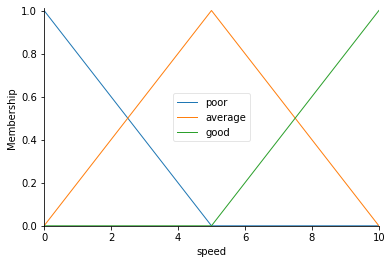

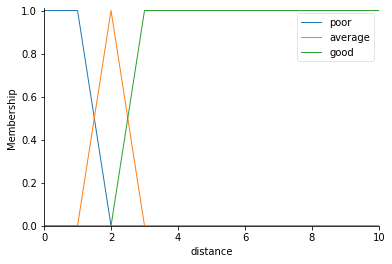

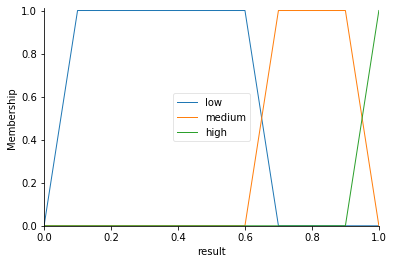

In [565]:
speed.view()
distance.view()
result.view()

In [566]:
tank_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [567]:
wynik = ctrl.ControlSystemSimulation(tank_ctrl)

In [568]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
wynik.input['speed'] = 10
wynik.input['distance'] = 0.4
# Crunch the numbers
wynik.compute()

0.9666666666666667


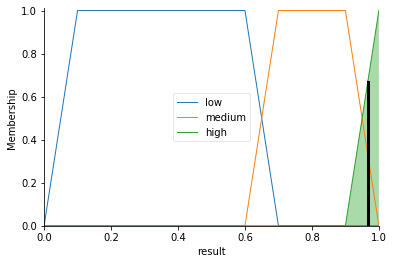

In [569]:
print(wynik.output['result'])
result.view(sim=wynik)

In [570]:
tab = np.arange(0,11,1)
for i in tab:
    wynik.input['speed'] = 9
    wynik.input['distance'] = i
    wynik.compute()
    print(wynik.output['result'])

0.9655555555555554
0.9655555555555554
0.643455497382199
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001
0.3500000000000001


In [572]:
vrep.simxFinish(-1) # closes all opened connections, in case any prevoius wasnt finished
clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5) # start a connection

if clientID!=-1:
    print ("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

#create instance of Tank
tank=Tank(clientID)

# get handle to proximity sensor
err_code,ps_handle = vrep.simxGetObjectHandle(clientID,"Proximity_sensor", vrep.simx_opmode_blocking)

t = time.time()
speed0 = 10
tank.go()
while (time.time()-t)<80: # 10 seconds of communitation
    #read values from proximity sensor
    
    err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,ps_handle,vrep.simx_opmode_streaming)
    distance = np.linalg.norm(detectedPoint)
    # avoid collision
    
    #speed0 = tank.readVelocity()
    wynik.input['speed'] = speed0
    wynik.input['distance'] = distance
    wynik.compute()
    tank.forward(speed0 - speed0 * wynik.output['result'])
    print('Hamowanie',wynik.output['result'],'Dystans',distance,'Predkosc',tank.readVelocity())
    
    
    
    

vrep.simxStopSimulation(clientID,vrep.simx_opmode_oneshot) # stop the simulation in vrep

Connected to remote API server
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Ham

Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.182982234271058 Predkosc 6.5
Hamowanie 0.35 Dystans 7.196931109785434 Predkosc 6.5
Hamowanie 0.35 Dystans 7.196

Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279745737377252 Predkosc 6.5
Hamowanie 0.35 Dystans 7.279

Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 0.35 Dystans 7.2277486546998135 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predkosc 6.5
Hamowanie 0.35 Dystans 7.05666570421416 Predko

Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.8962428624195935 Predkosc 6.5
Hamowanie 0.35 Dystans 6.853909223295973 Predkosc 6.5
Hamowanie 0

Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763542102112982 Predkosc 6.5
Hamowanie 0.35 Dystans 6.763

Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.694294776483267 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676036118044418 Predkosc 6.5
Hamowanie 0.35 Dystans 6.676

Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.628154780476252 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613475545952286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.613

Hamowanie 0.35 Dystans 6.557172933054696 Predkosc 6.5
Hamowanie 0.35 Dystans 6.557172933054696 Predkosc 6.5
Hamowanie 0.35 Dystans 6.557172933054696 Predkosc 6.5
Hamowanie 0.35 Dystans 6.557172933054696 Predkosc 6.5
Hamowanie 0.35 Dystans 6.557172933054696 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536976618358901 Predkosc 6.5
Hamowanie 0.35 Dystans 6.536

Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4694727521483895 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 0.35 Dystans 6.4430210307828855 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.3657565941638286 Predkosc 6.5
Hamowanie 0.35 Dystans 6.341181235883334 Predkosc 6.5
Hamowanie 0.35 Dystans 6.341181235883334 Predkosc 6.5
Hamowanie 0.35 Dystans 6.341181235883334 Predkosc 6.5
Hamowanie 0.35 Dystans 6.341181235883334 Predkosc 6.5
Hamowanie 0.35 Dystans 6.341181235883334 Predkosc 6.5
Hamowanie 0.35 Dystans 6.341181235883334 Predkosc 6.5
Hamowanie 0.35 D

Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267235888086503 Predkosc 6.5
Hamowanie 0.35 Dystans 6.267

Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177737330634306 Predkosc 6.5
Hamowanie 0.35 Dystans 6.177

Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 0.35 Dystans 6.0842964430612625 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001709513636898 Predkosc 6.5
Hamowanie 0.35 Dystans 6.001

Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908120611503099 Predkosc 6.5
Hamowanie 0.35 Dystans 5.908

Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816895134632858 Predkosc 6.5
Hamowanie 0.35 Dystans 5.816

Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719223977795764 Predkosc 6.5
Hamowanie 0.35 Dystans 5.719

Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627580848437994 Predkosc 6.5
Hamowanie 0.35 Dystans 5.627

Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547023509048565 Predkosc 6.5
Hamowanie 0.35 Dystans 5.547

Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455324554963916 Predkosc 6.5
Hamowanie 0.35 Dystans 5.455

Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363579492318608 Predkosc 6.5
Hamowanie 0.35 Dystans 5.363

Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 0.35 Dystans 5.2623800314237705 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 0.35 Dystans 5.1753568154381755 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 5.108425896177816 Predkosc 6.5
Hamowanie 0.35 Dystans 5.108425896177816 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087472634105975 Predkosc 6.5
Hamowanie 0.35 Dystans 5.087

Hamowanie 0.35 Dystans 5.019938214790247 Predkosc 6.5
Hamowanie 0.35 Dystans 5.019938214790247 Predkosc 6.5
Hamowanie 0.35 Dystans 5.019938214790247 Predkosc 6.5
Hamowanie 0.35 Dystans 5.019938214790247 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999002115915644 Predkosc 6.5
Hamowanie 0.35 Dystans 4.999

Hamowanie 0.35 Dystans 4.934941625554532 Predkosc 6.5
Hamowanie 0.35 Dystans 4.934941625554532 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911097608168859 Predkosc 6.5
Hamowanie 0.35 Dystans 4.911

Hamowanie 0.35 Dystans 4.831728843297046 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804948559020952 Predkosc 6.5
Hamowanie 0.35 Dystans 4.804

Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.736992841464554 Predkosc 6.5
Hamowanie 0.35 Dystans 4.715571224991429 Predkosc 6.5
Hamowanie 0.35 Dystans 4.715571224991429 Predkosc 6.5
Hamowanie 0.35 Dystans 4.715571224991429 Predkosc 6.5
Hamowanie 0.35 Dystans 4.715

Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 0.35 Dystans 4.6505060652427135 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558820943093443 Predkosc 6.5
Hamowanie 0.35 Dystans 4.558

Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468188938769355 Predkosc 6.5
Hamowanie 0.35 Dystans 4.468

Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 0.35 Dystans 4.3714933573428185 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282863022614173 Predkosc 6.5
Hamowanie 0.35 Dystans 4.282

Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191569932042624 Predkosc 6.5
Hamowanie 0.35 Dystans 4.191

Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100686749915058 Predkosc 6.5
Hamowanie 0.35 Dystans 4.100

Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predkosc 6.5
Hamowanie 0.35 Dystans 4.00805345451744 Predko

Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 0.35 Dystans 3.9130507852826844 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 3.846999020098753 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0.35 Dystans 3.8251166616449885 Predkosc 6.5
Hamowanie 0

Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 0.35 Dystans 3.7377758671521697 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642677335828062 Predkosc 6.5
Hamowanie 0.35 Dystans 3.642

Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5733036090250927 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 3.5004844669476842 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5004844669476842 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5004844669476842 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5004844669476842 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5004844669476842 Predkosc 6.5
Hamowanie 0.35 Dystans 3.5004844669476842 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans 3.475070849632215 Predkosc 6.5
Hamowanie 0.35 Dystans

Hamowanie 0.35 Dystans 3.4088282739756925 Predkosc 6.5
Hamowanie 0.35 Dystans 3.4088282739756925 Predkosc 6.5
Hamowanie 0.35 Dystans 3.4088282739756925 Predkosc 6.5
Hamowanie 0.35 Dystans 3.4088282739756925 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.38676559116936 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3867655911693

Hamowanie 0.35 Dystans 3.39323186182201 Predkosc 6.5
Hamowanie 0.35 Dystans 3.39323186182201 Predkosc 6.5
Hamowanie 0.35 Dystans 3.39323186182201 Predkosc 6.5
Hamowanie 0.35 Dystans 3.39323186182201 Predkosc 6.5
Hamowanie 0.35 Dystans 3.39323186182201 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.373630478887298 Predkosc 6.5
Hamowanie 0.35 Dystans 3.37363047

Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.3063546382612405 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dystans 3.280586456336848 Predkosc 6.5
Hamowanie 0.35 Dyst

Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 0.35 Dystans 3.2132125168708656 Predkosc 6.5
Hamowanie 

Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131535569306355 Predkosc 6.5
Hamowanie 0.35 Dystans 3.131

Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 0.35 Dystans 3.0397208430256115 Predkosc 6.5
Hamowanie 

Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamowanie 0.3631513433369793 Dystans 2.9523815744837325 Predkosc 6.368486566630207
Hamo

Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.241662448506986
Hamowanie 0.37583375514930134 Dystans 2.9065288939873533 Predkosc 6.24166244

Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamowanie 0.38781435064527076 Dystans 2.863458320385257 Predkosc 6.121856493547293
Hamo

Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.007006269499183
Hamowanie 0.39929937305008173 Dystans 2.8225545981662723 Predkosc 6.00700626

Hamowanie 0.40557027625988834 Dystans 2.800434504361403 Predkosc 5.944297237401116
Hamowanie 0.40557027625988834 Dystans 2.800434504361403 Predkosc 5.944297237401116
Hamowanie 0.40557027625988834 Dystans 2.800434504361403 Predkosc 5.944297237401116
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4115130251363862 Dystans 2.779638758593368 Predkosc 5.884869748636138
Hamowanie 0.4

Hamowanie 0.41684378527318244 Dystans 2.7611390157543845 Predkosc 5.831562147268175
Hamowanie 0.41684378527318244 Dystans 2.7611390157543845 Predkosc 5.831562147268175
Hamowanie 0.41684378527318244 Dystans 2.7611390157543845 Predkosc 5.831562147268175
Hamowanie 0.41684378527318244 Dystans 2.7611390157543845 Predkosc 5.831562147268175
Hamowanie 0.41684378527318244 Dystans 2.7611390157543845 Predkosc 5.831562147268175
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121
Hamowanie 0.42336665488488784 Dystans 2.738721434336723 Predkosc 5.766333451151121

Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.42826238596631117 Dystans 2.7220678344724885 Predkosc 5.717376140336889
Hamowanie 0.4321467417831582 Dystans 2.708966577794073 Predkosc 5.678532582168418
Hamowanie 0.4321467417831582 Dystans 2.708966577794073 Predkosc 5.678532582168418
Hamowanie 0.4321467417831582 Dystans 2.708966577794073 Predkosc 5.678532582168418
Hamowanie 0.4321467417831582 Dystans 2.708966577794073 Predkosc 5.678532582168418


Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.618676460415771
Hamowanie 0.43813235395842287 Dystans 2.6889834263844445 Predkosc 5.61867646

Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.502102885885584
Hamowanie 0.44978971141144153 Dystans 2.6508325582182004 Predkosc 5.50210288

Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.369854203527766
Hamowanie 0.46301457964722337 Dystans 2.6088871732348675 Predkosc 5.36985420

Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamowanie 0.47391713465707913 Dystans 2.575457956649373 Predkosc 5.260828653429209
Hamo

Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.1318740833467285
Hamowanie 0.48681259166532714 Dystans 2.537336537309667 Predkosc 5.131874083

Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.9854804664195305
Hamowanie 0.5014519533580469 Dystans 2.4963115191927274 Predkosc 4.985480466

Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530974346339599 Dystans 2.373639673441591 Predkosc 4.469025653660401
Hamowanie 0.5530

Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699562238188044 Dystans 2.337321263028991 Predkosc 4.300437761811956
Hamowanie 0.5699

Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.305175163282934 Predkosc 4.14351555586146
Hamowanie 0.585648444413854 Dystans 2.30

Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamowanie 0.6022369019509461 Dystans 2.2729040586334053 Predkosc 3.977630980490538
Hamo

Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamowanie 0.6172070339946236 Dystans 2.2452527337966486 Predkosc 3.827929660053764
Hamo

Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.6636598834600864
Hamowanie 0.6336340116539914 Dystans 2.2164631847415617 Predkosc 3.663659883

Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452109453527826 Dystans 2.197115036047552 Predkosc 3.547890546472175
Hamowanie 0.6452

Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamowanie 0.6595314886703303 Dystans 2.1742160142661833 Predkosc 3.404685113296697
Hamo

Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamowanie 0.6761504549138273 Dystans 2.1490139744664227 Predkosc 3.238495450861727
Hamo

Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.0864886865291474
Hamowanie 0.6913511313470853 Dystans 2.1271889243366178 Predkosc 3.086488686

Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamowanie 0.7123217465171224 Dystans 2.098886191032789 Predkosc 2.8767825348287754
Hamo

Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297344349374949 Dystans 2.07687511913319 Predkosc 2.7026556506250508
Hamowanie 0.7297

Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamowanie 0.7700675284242051 Dystans 2.030582908555549 Predkosc 2.2993247157579493
Hamo

Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamowanie 0.7638145661000804 Dystans 2.0373588964526346 Predkosc 2.361854338999196
Hamo

Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.2338086344676755
Hamowanie 0.7766191365532324 Dystans 2.0236313835792736 Predkosc 2.233808634

Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.1183867776631047
Hamowanie 0.7881613222336895 Dystans 2.0117413887223563 Predkosc 2.118386777

Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991079692324405 Dystans 2.000869167283312 Predkosc 2.008920307675595
Hamowanie 0.7991

Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8001810108841132 Dystans 1.9934708608890537 Predkosc 1.9981898911588676
Hamowanie 0.8003986038242599 Dystans 1.9855883998295836 Predkosc 1.9960139617574022
Hamowanie 0.8003986038242599 Dystans 1.9855883998295836 Predkosc 1.9960139617574022
Hamowanie 0.8003986038242599 Dystans 1.9855883998295836 Predkosc 1.9960139617574022
Hamowanie 0.8003986038242599 Dystans 1.9855883998295836 Predkosc 1.996013961

Hamowanie 0.8006244322438157 Dystans 1.9773685030979933 Predkosc 1.9937556775618432
Hamowanie 0.8006244322438157 Dystans 1.9773685030979933 Predkosc 1.9937556775618432
Hamowanie 0.8006244322438157 Dystans 1.9773685030979933 Predkosc 1.9937556775618432
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
Hamowanie 0.8008885559140488 Dystans 1.9677040511423367 Predkosc 1.991114440859512
H

Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.9882957728821289
Hamowanie 0.8011704227117871 Dystans 1.9573299731803782 Predkosc 1.988295772

Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.9844352936780574
Hamowanie 0.8015564706321943 Dystans 1.9430200229014487 Predkosc 1.984435293

Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamowanie 0.8019263542864606 Dystans 1.9291988202887023 Predkosc 1.980736457135393
Hamo

Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamowanie 0.8023056293098402 Dystans 1.9149140890315217 Predkosc 1.976943706901599
Hamo

Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamowanie 0.8026810027493024 Dystans 1.9006636647428388 Predkosc 1.973189972506976
Hamo

Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamowanie 0.8029834277219968 Dystans 1.8891008535633476 Predkosc 1.970165722780031
Hamo

Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.9676036542480482
Hamowanie 0.8032396345751952 Dystans 1.8792479010267538 Predkosc 1.967603654

Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamowanie 0.8036324191038993 Dystans 1.8640403942920944 Predkosc 1.963675808961007
Hamo

Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamowanie 0.8040495127870687 Dystans 1.847755933529927 Predkosc 1.9595048721293136
Hamo

Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.9544363903719226
Hamowanie 0.8045563609628077 Dystans 1.8277783931974811 Predkosc 1.954436390

Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamowanie 0.804895205898254 Dystans 1.8143068654108478 Predkosc 1.9510479410174604
Hamo

Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.9402448173984084
Hamowanie 0.8059755182601592 Dystans 1.7707342289654378 Predkosc 1.940244817

Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamowanie 0.8055662089435512 Dystans 1.7873547768455658 Predkosc 1.944337910564487
Hamo

Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.9412669457898684
Hamowanie 0.8058733054210132 Dystans 1.7748975088804015 Predkosc 1.941266945

Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamowanie 0.8061266835488483 Dystans 1.764561419069649 Predkosc 1.9387331645115164
Hamo

Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.80632299270508 Dystans 1.7565173199379396 Predkosc 1.9367700729491997
Hamowanie 0.8063

Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.9334560036911483
Hamowanie 0.8066543996308853 Dystans 1.7428658870634288 Predkosc 1.933456003

Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.9297914472503166
Hamowanie 0.8070208552749683 Dystans 1.7276660557770258 Predkosc 1.929791447

Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.9256993064927155
Hamowanie 0.8074300693507285 Dystans 1.7105625856349362 Predkosc 1.925699306

Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamowanie 0.8078660840930749 Dystans 1.692187660465275 Predkosc 1.9213391590692517
Hamo

Hamowanie 0.8079989922533009 Dystans 1.686555446509972 Predkosc 1.9200100774669906
Hamowanie 0.8079989922533009 Dystans 1.686555446509972 Predkosc 1.9200100774669906
Hamowanie 0.8079989922533009 Dystans 1.686555446509972 Predkosc 1.9200100774669906
Hamowanie 0.8079989922533009 Dystans 1.686555446509972 Predkosc 1.9200100774669906
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298117
Hamowanie 0.8088567447570187 Dystans 1.6498569220983998 Predkosc 1.9114325524298

Hamowanie 0.8090305897533088 Dystans 1.642345151225109 Predkosc 1.9096941024669114
Hamowanie 0.8090305897533088 Dystans 1.642345151225109 Predkosc 1.9096941024669114
Hamowanie 0.8090305897533088 Dystans 1.642345151225109 Predkosc 1.9096941024669114
Hamowanie 0.8090305897533088 Dystans 1.642345151225109 Predkosc 1.9096941024669114
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.808488042988973 Dystans 1.6657059132570262 Predkosc 1.915119570110269
Hamowanie 0.

Hamowanie 0.8086335628397546 Dystans 1.6594639898394783 Predkosc 1.9136643716024544
Hamowanie 0.8086335628397546 Dystans 1.6594639898394783 Predkosc 1.9136643716024544
Hamowanie 0.8086335628397546 Dystans 1.6594639898394783 Predkosc 1.9136643716024544
Hamowanie 0.8086335628397546 Dystans 1.6594639898394783 Predkosc 1.9136643716024544
Hamowanie 0.8086335628397546 Dystans 1.6594639898394783 Predkosc 1.9136643716024544
Hamowanie 0.8086335628397546 Dystans 1.6594639898394783 Predkosc 1.9136643716024544
Hamowanie 0.808728359180328 Dystans 1.6553884119032833 Predkosc 1.9127164081967187
Hamowanie 0.808728359180328 Dystans 1.6553884119032833 Predkosc 1.9127164081967187
Hamowanie 0.808728359180328 Dystans 1.6553884119032833 Predkosc 1.9127164081967187
Hamowanie 0.808728359180328 Dystans 1.6553884119032833 Predkosc 1.9127164081967187
Hamowanie 0.808728359180328 Dystans 1.6553884119032833 Predkosc 1.9127164081967187
Hamowanie 0.808728359180328 Dystans 1.6553884119032833 Predkosc 1.912716408196718

Hamowanie 0.8088593683314093 Dystans 1.6497437437568698 Predkosc 1.9114063166859072
Hamowanie 0.8088593683314093 Dystans 1.6497437437568698 Predkosc 1.9114063166859072
Hamowanie 0.8088593683314093 Dystans 1.6497437437568698 Predkosc 1.9114063166859072
Hamowanie 0.8088593683314093 Dystans 1.6497437437568698 Predkosc 1.9114063166859072
Hamowanie 0.8088593683314093 Dystans 1.6497437437568698 Predkosc 1.9114063166859072
Hamowanie 0.8088593683314093 Dystans 1.6497437437568698 Predkosc 1.9114063166859072
Hamowanie 0.8090421375680105 Dystans 1.6418452919974833 Predkosc 1.9095786243198951
Hamowanie 0.8090421375680105 Dystans 1.6418452919974833 Predkosc 1.9095786243198951
Hamowanie 0.8090421375680105 Dystans 1.6418452919974833 Predkosc 1.9095786243198951
Hamowanie 0.8090421375680105 Dystans 1.6418452919974833 Predkosc 1.9095786243198951
Hamowanie 0.8090421375680105 Dystans 1.6418452919974833 Predkosc 1.9095786243198951
Hamowanie 0.8090421375680105 Dystans 1.6418452919974833 Predkosc 1.909578624

Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamowanie 0.8091811705005064 Dystans 1.6358184703867982 Predkosc 1.908188294994936
Hamo

Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.8094151034373988 Dystans 1.6256419096365766 Predkosc 1.9058489656260118
Hamowanie 0.80961169504697 Dystans 1.617054839658393 Predkosc 1.903883049530

Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.9018508531636567
Hamowanie 0.8098149146836343 Dystans 1.6081447127907202 Predkosc 1.901850853

Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.8985329518731309
Hamowanie 0.8101467048126869 Dystans 1.5935241211495994 Predkosc 1.898532951

Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.8946909999399608
Hamowanie 0.8105309000060039 Dystans 1.5764806082492882 Predkosc 1.894690999

Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.8922013989788748
Hamowanie 0.8107798601021124 Dystans 1.5653711971377835 Predkosc 1.892201398

Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.8896245134300038
Hamowanie 0.8110375486569996 Dystans 1.5538183308287965 Predkosc 1.889624513

Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.8871982950284654
Hamowanie 0.8112801704971535 Dystans 1.5428907708457897 Predkosc 1.887198295

Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.8844949065906729
Hamowanie 0.8115505093409328 Dystans 1.5306575320887243 Predkosc 1.884494906

Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.8810619861835232
Hamowanie 0.8118938013816477 Dystans 1.5150359873878532 Predkosc 1.881061986

Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 Dystans 1.5031683068940378 Predkosc 1.87846819345115
Hamowanie 0.812153180654885 

Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.8654895800422313
Hamowanie 0.8134510419957769 Dystans 1.4872408493863365 Predkosc 1.865489580

Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150591608288817 Dystans 1.470970011789833 Predkosc 1.849408391711183
Hamowanie 0.8150

Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.8330772369009
Hamowanie 0.81669227630991 Dystans 1.454943142166894 Predkosc 1.

Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamowanie 0.8180728723604523 Dystans 1.4417847966084916 Predkosc 1.819271276395476
Hamo

Hamowanie 0.8184916351768008 Dystans 1.437864094933282 Predkosc 1.815083648231992
Hamowanie 0.8184916351768008 Dystans 1.437864094933282 Predkosc 1.815083648231992
Hamowanie 0.8184916351768008 Dystans 1.437864094933282 Predkosc 1.815083648231992
Hamowanie 0.8184916351768008 Dystans 1.437864094933282 Predkosc 1.815083648231992
Hamowanie 0.8184916351768008 Dystans 1.437864094933282 Predkosc 1.815083648231992
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie 0.8190452206732458 Dystans 1.432731295414723 Predkosc 1.8095477932675426
Hamowanie

Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8197527713669326 Dystans 1.426253893256768 Predkosc 1.8024722863306746
Hamowanie 0.8204089901724739 Dystans 1.4203292762903623 Predkosc 1.795910098275261
Hamo

Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8209388916465693 Dystans 1.415603033189966 Predkosc 1.7906110835343068
Hamowanie 0.8216033337086907 Dystans 1.4097495836489045 Predkosc 1.7839666629130928
Ham

Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8225009124467809 Dystans 1.4019700637553758 Predkosc 1.7749908755321915
Hamowanie 0.8235413128456491 Dystans 1.3931348139504547 Predkosc 1.764586871

Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.7559567643214287
Hamowanie 0.8244043235678571 Dystans 1.3859528360823126 Predkosc 1.755956764

Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.7401925758897967
Hamowanie 0.8259807424110203 Dystans 1.3731727321397618 Predkosc 1.740192575

Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.6744202351731428
Hamowanie 0.8325579764826857 Dystans 1.3243693104595797 Predkosc 1.674420235

Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamowanie 0.8339597721297278 Dystans 1.314859708252772 Predkosc 1.6604022787027226
Hamo

Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.6918970467723646
Hamowanie 0.8308102953227635 Dystans 1.3366510545694579 Predkosc 1.691897046

Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.6704711236245249
Hamowanie 0.8329528876375475 Dystans 1.3216599672691223 Predkosc 1.670471123

Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamowanie 0.8341792370108647 Dystans 1.313397789033989 Predkosc 1.6582076298913524
Hamo

Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.6363050355802926
Hamowanie 0.8363694964419708 Dystans 1.2991964286467852 Predkosc 1.636305035

Hamowanie 0.8373593020122423 Dystans 1.2930048073882974 Predkosc 1.6264069798775775
Hamowanie 0.8373593020122423 Dystans 1.2930048073882974 Predkosc 1.6264069798775775
Hamowanie 0.8373593020122423 Dystans 1.2930048073882974 Predkosc 1.6264069798775775
Hamowanie 0.8373593020122423 Dystans 1.2930048073882974 Predkosc 1.6264069798775775
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.6176141418438146
Hamowanie 0.8382385858156186 Dystans 1.2876191266605592 Predkosc 1.617614141

Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.5495771943669485
Hamowanie 0.8450422805633051 Dystans 1.2493556637864334 Predkosc 1.549577194

Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.5270433791374423
Hamowanie 0.8472956620862557 Dystans 1.2379117235089137 Predkosc 1.527043379

Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.5667376145380238
Hamowanie 0.8433262385461977 Dystans 1.2584636686895019 Predkosc 1.566737614

Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamowanie 0.8441804671409316 Dystans 1.2538862098331953 Predkosc 1.558195328590683
Hamo

Hamowanie 0.8478602593541921 Dystans 1.2351327208693252 Predkosc 1.52139740645808
Hamowanie 0.8478602593541921 Dystans 1.2351327208693252 Predkosc 1.52139740645808
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowanie 0.8488030426093273 Dystans 1.230568663933891 Predkosc 1.5119695739067271
Hamowa

Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.5034424358193466
Hamowanie 0.8496557564180653 Dystans 1.2265213122739338 Predkosc 1.503442435

Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8525448290480223 Dystans 1.213355640895747 Predkosc 1.4745517095197762
Hamowanie 0.8541271666192781 Dystans 1.2064867523541798 Predkosc 1.458728333807219
Hamowanie 0.8541271666192781 Dystans 1.2064867523541798 Predkosc 1.458728333807219
Hamowanie 0.8541271666192781 Dystans 1.2064867523541798 Predkosc 1.458728333807219
Hamowanie 0.8541271666192781 Dystans 1.2064867523541798 Predkosc 1.458728333807219
Hamo

Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.8553505953688842 Dystans 1.2013336750499715 Predkosc 1.446494046311157
Hamowanie 0.856156064917505 Dystans 1.198013815411547 Predkosc 1.4384393508249502
Hamowanie 0.856156064917505 Dystans 1.198013815411547 Predkosc 1.4384393508249502
Hamowanie 0.856156064917505 Dystans 1.198013815411547 Predkosc 1.4384393508249502
Hamowan

Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8568523548978139 Dystans 1.195189416271012 Predkosc 1.4314764510218616
Hamowanie 0.8580147380396426 Dystans 1.1905661305213606 Predkosc 1.4198526196035743
Hamowanie 0.8580147380396426 Dystans 1.1905661305213606 Predkosc 1.4198526196035743
Hamowanie 0.8580147380396426 Dystans 1.1905661305213606 Predkosc 1.4198526196035743
H

Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8597211830098092 Dystans 1.1839803684181307 Predkosc 1.4027881699019087
Hamowanie 0.8615306352344445 Dystans 1.1772483361504649 Predkosc 1.3846936476555545
Hamowanie 0.8615306352344445 Dystans 1.1772483361504649 Predkosc 1.384693647

Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 Dystans 1.17189373311857 Predkosc 1.3698024756937102
Hamowanie 0.863019752430629 

Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.3462178502324047
Hamowanie 0.8653782149767595 Dystans 1.1637394153967697 Predkosc 1.346217850

Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.3145419223618244
Hamowanie 0.8685458077638175 Dystans 1.1533795489382959 Predkosc 1.314541922

Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722897497135078 Dystans 1.14194206019111 Predkosc 1.2771025028649223
Hamowanie 0.8722

Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.2533947086897754
Hamowanie 0.8746605291310224 Dystans 1.1351168396431388 Predkosc 1.253394708

Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamowanie 0.8779236589415186 Dystans 1.1262110208458254 Predkosc 1.220763410584814
Hamo

Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.1819440131066283
Hamowanie 0.8818055986893372 Dystans 1.1162963609123824 Predkosc 1.181944013

Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamowanie 0.8845471991977486 Dystans 1.109704075628927 Predkosc 1.1545280080225133
Hamo

Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamowanie 0.8864594906223803 Dystans 1.1052930802553935 Predkosc 1.135405093776198
Hamo

Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.889750168095685 Dystans 1.098040238170779 Predkosc 1.1024983190431499
Hamowanie 0.8897

Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.0570713051612142
Hamowanie 0.8942928694838786 Dystans 1.0886771553963925 Predkosc 1.057071305

Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamowanie 0.899947168476339 Dystans 1.0779696991949417 Predkosc 1.0005283152366093
Hamo

Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.9624204542601227
Hamowanie 0.9037579545739878 Dystans 1.0712850937189948 Predkosc 0.962420454

Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.9200706098830445
Hamowanie 0.9079929390116955 Dystans 1.0643096524539866 Predkosc 0.920070609

Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamowanie 0.9133526699087768 Dystans 1.056102113577837 Predkosc 0.8664733009122312
Hamo

Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamowanie 0.918845366666589 Dystans 1.0483371243866042 Predkosc 0.8115463333341104
Hamo

Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.7839885081774298
Hamowanie 0.9216011491822571 Dystans 1.0446653890891648 Predkosc 0.783988508

Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamowanie 0.925802438669678 Dystans 1.0393324942634838 Predkosc 0.7419756133032198
Hamo

Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.6737856243553644
Hamowanie 0.9326214375644635 Dystans 1.0312988242173196 Predkosc 0.673785624

Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909726354295252 Predkosc 0.333333333

Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamowanie 0.9462693904637253 Dystans 1.0172003851144056 Predkosc 0.537306095362748
Hamo

Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.5205333392812985
Hamowanie 0.9479466660718702 Dystans 1.0156266452264753 Predkosc 0.520533339

Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.4991769882031818
Hamowanie 0.9500823011796817 Dystans 1.0136681266451453 Predkosc 0.499176988

Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9744151028365046 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9693968388982905 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9678358370306369 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9681645943879982 Predkosc 0.333333333

Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.35268205749536996
Hamowanie 0.964731794250463 Dystans 1.0014665803829648 Predkosc 0.3526820574

Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.3415160209127368
Hamowanie 0.9658483979087263 Dystans 1.0006164440643306 Predkosc 0.341516020

Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9518129550197264 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9472868084134026 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.947391961124051 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9920777573567588 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9909204610266464 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9889226345637047 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9853475219970333 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9840044451741312 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9843420462676596 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9846975668826844 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9831303443466733 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9812604856608572 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.979160789638777 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9779589003020474 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9770441531677501 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9764978603236821 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9757464424328709 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9747641037460498 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9729940740155594 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9696725666337408 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9666208100463651 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9630633143682984 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9573137221456194 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9494800882831834 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9450306804235694 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9450306804235694 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9419143920436339 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.9394932054746251 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8908672701574928 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8938708576155325 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8854844097716372 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8849064785765098 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8861941698728708 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8861941698728708 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.8781624581688703 Predkosc 0.333333333

Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.924782709891521 Predkosc 0.3333333333333339
Hamo

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dystans 0.0 Predkosc 0.3333333333333339
Hamowanie 0.9666666666666667 Dysta

1